# Análise dos acidentes de trânsito de Porto Alegre

## Objetivo

Você atua no departamento de análise de dados da EPTC e o time de gestores(as) precisa de algumas informações sobre os acidentes para avaliar necessidades de ações para evitar novas ocorrências.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

**Perguntas**


1.   Como está a evolução dos acidentes nos últimos anos?
2.   O número de acidentes diminuiu de 2019 para 2020?
3.   Quais são os tipos de acidentes com maior ocorrência?
4.   Qual a frequência de óbitos em acidentes nos últimos anos?
5.   Qual o tipo de acidente com maior número de óbitos?


Adicionalmente, você é instigado a realizar uma apresentação, com os locais dos acidentes ocorridos ao longo desse ano.

**Nota**

Abuse das visões gráficas para embasar sua análise.

Aqui está o link para os nossos dados:

https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL = 'https://dadosabertos.poa.br/dataset/d6cfbe48-ee1f-450f-87f5-9426f6a09328/resource/b56f8123-716a-4893-9348-23945f1ea1b9/download/cat_acidentes.csv'

In [6]:
import pandas as pd


df_raw = pd.read_csv(URL, sep=';')

In [7]:
df_raw.head(2)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2021-12-01 01:35:32,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2021-12-01 01:35:32,8487,0.0,2016-01-01 00:00:00,0,0,0,1,1,1,...,-51.095216,-30.134588,ESTR JOAO DE OLIVEIRA REMIAO,NaN,CHOQUE,SEXTA-FEIRA,12:00:00.0000000,DIA,LESTE,NaN


In [8]:
df_raw.shape

(72249, 34)

In [9]:
df_raw.dtypes

data_extracao     object
predial1           int64
queda_arr        float64
data              object
feridos            int64
feridos_gr         int64
mortes             int64
morte_post         int64
fatais             int64
auto               int64
taxi               int64
lotacao            int64
onibus_urb         int64
onibus_met         int64
onibus_int         int64
caminhao           int64
moto               int64
carroca            int64
bicicleta          int64
outro              int64
cont_vit           int64
ups                int64
patinete           int64
idacidente         int64
longitude        float64
latitude         float64
log1              object
log2              object
tipo_acid         object
dia_sem           object
hora              object
noite_dia         object
regiao            object
consorcio         object
dtype: object

### Como está a evolução dos acidentes nos últimos anos?

In [10]:
df_raw['data'].value_counts()

2016-08-29 00:00:00    69
2016-04-11 00:00:00    67
2018-11-19 00:00:00    67
2016-03-18 00:00:00    66
2016-10-06 00:00:00    66
                       ..
2021-12-14 00:00:00     1
2021-12-19 00:00:00     1
2018-11-04 01:00:00     1
3031-04-03 00:00:00     1
5021-08-06 00:00:00     1
Name: data, Length: 2166, dtype: int64

In [24]:
linhas_c_erro = df_raw[ (df_raw['data'] == '5021-08-06 00:00:00') | \
                        (df_raw['data'] == '3031-04-03 00:00:00')     ]

In [18]:
linhas_c_erro.index

Int64Index([62986, 67888], dtype='int64')

In [19]:
df_analise = df_raw.drop(index=linhas_c_erro.index, axis=0)

In [20]:
df_analise['data'].value_counts()

2016-08-29 00:00:00    69
2016-04-11 00:00:00    67
2018-11-19 00:00:00    67
2016-10-06 00:00:00    66
2016-03-18 00:00:00    66
                       ..
2021-11-29 00:00:00     2
2018-11-04 01:00:00     1
2021-12-19 00:00:00     1
2021-12-14 00:00:00     1
2202-09-30 00:00:00     1
Name: data, Length: 2164, dtype: int64

In [27]:
df_analise[df_analise['data'] == '2202-09-30 00:00:00'].index

Int64Index([], dtype='int64')

In [23]:
df_analise.drop(index=69795, inplace=True)

In [28]:
df_analise['data'] = pd.to_datetime(df_analise['data'])

<AxesSubplot:xlabel='data'>

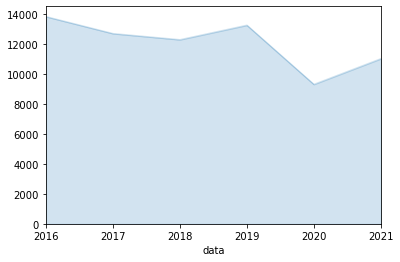

In [32]:
df_analise.groupby(pd.Grouper(key='data', freq='y'))['idacidente'].count().plot(kind='area', alpha= .2)

In [34]:
df_comp_ano = df_analise.groupby(pd.Grouper(key='data', freq='y'))['idacidente'].count()

In [36]:
df_comp_ano = pd.DataFrame(df_comp_ano)

In [38]:
df_comp_ano.reset_index(inplace=True)

In [49]:
df_comp_ano = df_comp_ano[ (df_comp_ano['data'] > '2018-12-31') & (df_comp_ano['data'] < '2021-01-01') ]

### O número de acidentes diminuiu de 2019 para 2020?

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

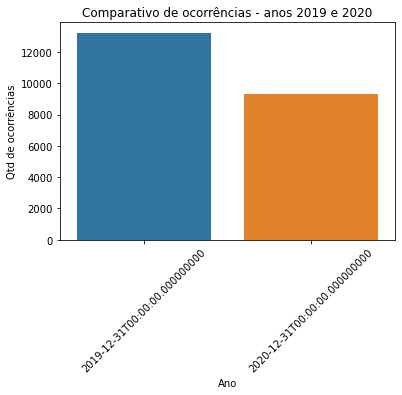

In [55]:
sns.barplot(data=df_comp_ano, x='data', y='idacidente')

plt.title('Comparativo de ocorrências - anos 2019 e 2020')
plt.xlabel('Ano')
plt.ylabel('Qtd de ocorrências')
plt.xticks(rotation=45)

plt.show()

### Quais são os tipos de acidentes com maior ocorrência?

In [56]:
df_analise.head(2)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2021-12-01 01:35:32,0,0.0,2020-10-17,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2021-12-01 01:35:32,8487,0.0,2016-01-01,0,0,0,1,1,1,...,-51.095216,-30.134588,ESTR JOAO DE OLIVEIRA REMIAO,NaN,CHOQUE,SEXTA-FEIRA,12:00:00.0000000,DIA,LESTE,NaN


In [61]:
tipo_acidente = df_analise.groupby(by='2021-12-31  ABALROAMENTO      4885
            ATROPELAMENTO      578
            CAPOTAGEM           57
            CHOQUE            1192
            COLISÃO           3347
            EVENTUAL           173
            INCÊNDIO             7
            NAO CADASTRADO     392
            QUEDA              292
            TOMBAMENTO          73tipo_acid')['idacidente'].count().sort_values(ascending=False)

In [63]:
tipo_acidente = pd.DataFrame(tipo_acidente)

In [65]:
tipo_acidente.reset_index(inplace=True)

In [66]:
tipo_acidente

,tipo_acid,idacidente
0,ABALROAMENTO,35052
1,COLISÃO,21815
2,CHOQUE,6142
3,ATROPELAMENTO,4740
4,QUEDA,2470
5,EVENTUAL,1049
6,NAO CADASTRADO,417
7,CAPOTAGEM,294
8,TOMBAMENTO,240
9,INCÊNDIO,27


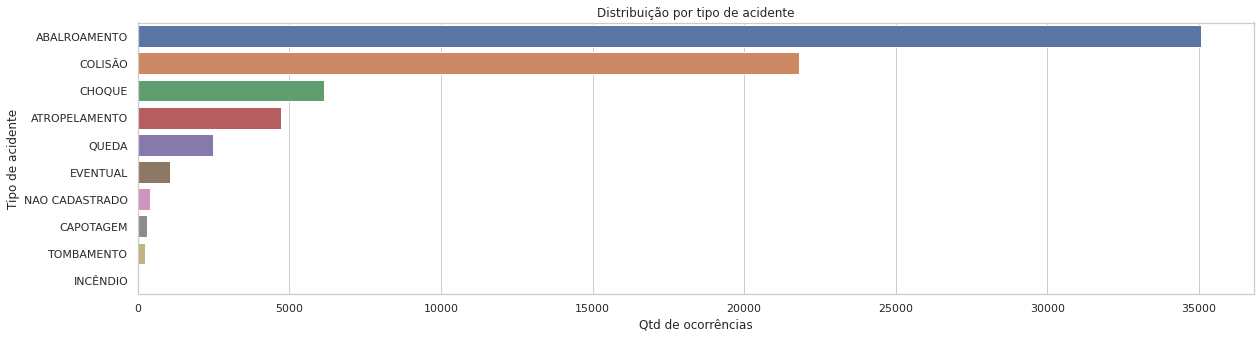

In [95]:
plt.figure(figsize=(20,5))

sns.set_theme(style='whitegrid')

sns.barplot(data=tipo_acidente, x='idacidente', y='tipo_acid')

plt.title('Distribuição por tipo de acidente' )
plt.ylabel('Tipo de acidente')
plt.xlabel('Qtd de ocorrências')
plt.show()

In [96]:
df_analise.groupby([pd.Grouper(key='data', freq='y'), 'tipo_acid'])['idacidente'].count()

data        tipo_acid     
2016-12-31  ABALROAMENTO      6631
            ATROPELAMENTO     1073
            CAPOTAGEM           43
            CHOQUE            1111
            COLISÃO           4192
            EVENTUAL           156
            INCÊNDIO             5
            QUEDA              577
            TOMBAMENTO          12
2017-12-31  ABALROAMENTO      6331
            ATROPELAMENTO      889
            CAPOTAGEM           40
            CHOQUE             975
            COLISÃO           3819
            EVENTUAL           185
            INCÊNDIO             3
            NAO CADASTRADO       1
            QUEDA              412
            TOMBAMENTO          16
2018-12-31  ABALROAMENTO      5911
            ATROPELAMENTO      830
            CAPOTAGEM           51
            CHOQUE             982
            COLISÃO           3834
            EVENTUAL           191
            INCÊNDIO             4
            NAO CADASTRADO      13
            QUEDA           

### Qual a frequência de óbitos em acidentes nos últimos anos?

In [110]:
obitos = df_analise.groupby(pd.Grouper(key='data', freq='y'))['fatais'].sum()

In [111]:
obitos = pd.DataFrame(obitos)
obitos.reset_index(inplace=True)
obitos

,data,fatais
0,2016-12-31,92
1,2017-12-31,90
2,2018-12-31,75
3,2019-12-31,74
4,2020-12-31,64
5,2021-12-31,73


In [112]:
obitos['ano'] = pd.DatetimeIndex(obitos['data']).year

<AxesSubplot:xlabel='ano', ylabel='fatais'>

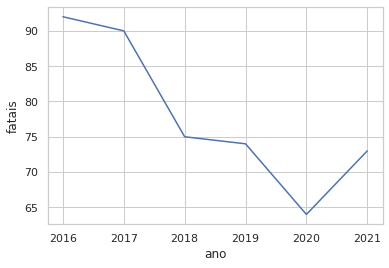

In [113]:
sns.lineplot(data=obitos, x='ano', y='fatais')

In [117]:
obitos_cat = df_analise.groupby([pd.Grouper(key='data', freq='y'), 'tipo_acid'])['fatais'].sum()

In [119]:
obitos_cat = pd.DataFrame(obitos_cat)
obitos_cat.reset_index(inplace=True)
obitos_cat['ano'] = pd.DatetimeIndex(obitos_cat['data']).year

### Qual o tipo de acidente com maior número de óbitos?

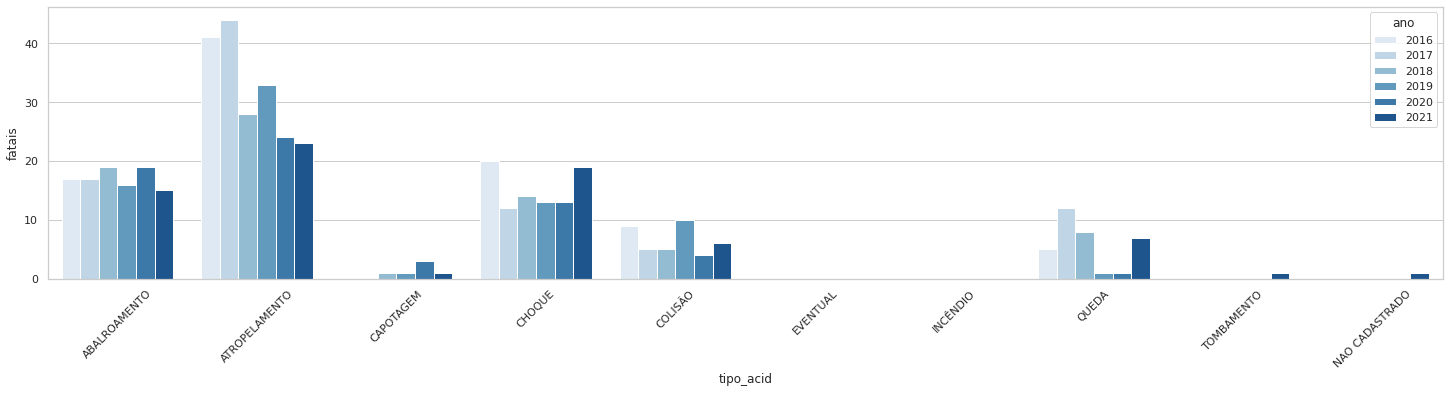

In [127]:
plt.figure(figsize=(25,5))

sns.barplot(data=obitos_cat, x='tipo_acid', y='fatais', hue='ano', palette='Blues')
plt.xticks(rotation=45)

plt.show()

# Desafio do mapa

In [146]:
dados2021 = df_analise[df_analise['data'] >= '2021-01-01 00:00:00']

In [147]:
mapa = dados2021[['data','longitude', 'latitude', 'log1', 'tipo_acid']]

In [148]:
mapa['longitude'].isnull().sum()

666

In [149]:
mapa.shape

(10996, 5)

In [138]:
!pip install geopy

In [153]:
mapa['log1']

60605                R SILVEIRO , Porto Alegre, RS, Brasil
60606                        nan, Porto Alegre, RS, Brasil
60607    R JOSE INACIO DA CUNHA , Porto Alegre, RS, Brasil
60609            R DONA TEODORA , Porto Alegre, RS, Brasil
60611              ESTR VAREJAO , Porto Alegre, RS, Brasil
                               ...                        
72244               AV IPIRANGA , Porto Alegre, RS, Brasil
72245    AV VERISSIMO DE AMARAL , Porto Alegre, RS, Brasil
72246           AV ASSIS BRASIL , Porto Alegre, RS, Brasil
72247             AV A J RENNER , Porto Alegre, RS, Brasil
72248        AV DR NILO PECANHA , Porto Alegre, RS, Brasil
Name: log1, Length: 10996, dtype: object

In [151]:
def inserir_cid_est(endereco):
    return str(endereco) + ', Porto Alegre, RS, Brasil'

In [152]:
mapa['log1'] = mapa['log1'].apply(lambda x : inserir_cid_est(x))

In [154]:
!pip install tqdm

In [155]:
enderecos = mapa[mapa['longitude'].isnull()]

In [156]:
enderecos.shape

(666, 5)

In [157]:
from tqdm import tqdm
tqdm.pandas()

In [158]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='app_tt')

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
%%time

enderecos['coordenadas'] = enderecos['log1'].progress_apply(geocode)

 69%|████████████████████████████▏            | 457/666 [07:35<03:27,  1.01it/s]